In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
dataset=pd.read_csv('./Happy_Dataset.csv')
dataset.head()

,X1,X2,X3,X4,X5,X6,D
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [3]:
#Show Key Statistics
dataset.describe()

,X1,X2,X3,X4,X5,X6,D
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [4]:
#Create Profile Report
 
#Importing package
import pandas_profiling as pp
from IPython.display import IFrame
 
# Profile Report
Happy_DatasetReport = pp.ProfileReport(dataset)
Happy_DatasetReport.to_file('Happy_DatasetW5a-lbfgs.html')
display(IFrame('Happy_DatasetW5a-lbfgs.html', width=900, height=350))

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
#   p <= alpha(0.05): reject H0, not the same covariance.
#   p > alpha(0.05): fail to reject H0, same covariance.

import scipy.stats as stats
names=dataset.get('D')

cnt=1
for col in dataset.columns:
    if (col=='D'):
        continue
        
    stat, p = stats.levene(dataset[col][dataset['D'] == names[0]], 
               dataset[col][dataset['D'] == names[1]])

    print(col)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Covariance the Same (fail to reject H0)')
        print('\n')
    else:
        print('Covariance different(reject H0)')
        print('\n')
    cnt +=1   

X1
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


X2
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


X3
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


X4
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


X5
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


X6
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)




In [6]:
#Normality test - Shapiro-Wilk Test
# p <= alpha(0.05): reject H0, not normal.
# p > alpha(0.05): fail to reject H0, normal.

from scipy.stats import shapiro

cnt=1
for col in dataset.columns:
    if (col=='D'):
        continue
        
    stat, p = shapiro(dataset[col])

    print(col)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
        print('\n')
    else:
        print('Sample does not look Gaussian (reject H0)')
        print('\n')
    cnt +=1  

X1
Statistics=0.763, p=0.000
Sample does not look Gaussian (reject H0)


X2
Statistics=0.902, p=0.000
Sample does not look Gaussian (reject H0)


X3
Statistics=0.894, p=0.000
Sample does not look Gaussian (reject H0)


X4
Statistics=0.867, p=0.000
Sample does not look Gaussian (reject H0)


X5
Statistics=0.873, p=0.000
Sample does not look Gaussian (reject H0)


X6
Statistics=0.790, p=0.000
Sample does not look Gaussian (reject H0)




In [8]:
#Create x and y variables
x = dataset.drop('D', axis=1).to_numpy()
Y = dataset['D'].to_numpy()

#Create Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,stratify=Y,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.transform(x_test)

#Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [9]:
#Class Balance - Test Data
print('Train Data - Class Split')
num_zeros = (y_train_smt == 0).sum()
num_ones = (y_train_smt == 1).sum()
print('Class 0 -',  num_zeros)
print('Class 1 -',  num_ones)

Train Data - Class Split
Class 0 - 61
Class 1 - 61


In [10]:
#Base LDA, QDA and Logistical Regression Model
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('LDA', LinearDiscriminantAnalysis()),('QDA',QuadraticDiscriminantAnalysis()),
                   ('LogReg',LogisticRegression(solver='lbfgs',
                                               class_weight='balanced',
                                               random_state=100))]: 
    method.fit(x_train2,y_train_smt)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))      


Estimator: LDA
[[ 8  5]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.74      0.88      0.80        16

    accuracy                           0.76        29
   macro avg       0.77      0.75      0.75        29
weighted avg       0.77      0.76      0.75        29


Estimator: QDA
[[ 9  4]
 [ 3 13]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.76      0.81      0.79        16

    accuracy                           0.76        29
   macro avg       0.76      0.75      0.75        29
weighted avg       0.76      0.76      0.76        29


Estimator: LogReg
[[ 8  5]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.74      0.88      0.80        16

    accuracy                           0.76        29
   macro avg       0

In [11]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_lda = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearDiscriminantAnalysis())])
pipeline.insert(0,pipe_lda)

pipe_qda = Pipeline([('scl', StandardScaler()),
                    ('clf', QuadraticDiscriminantAnalysis())])
pipeline.insert(1,pipe_qda)

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='lbfgs',
                                               class_weight='balanced',
                                               random_state=100))])   
pipeline.insert(2,pipe_logreg)
    
    
# Set grid search params 

modelpara =[]

param_gridlda = {'clf__solver':['svd','lsqr','eigen']}
modelpara.insert(0,param_gridlda)

param_gridqda = {}
modelpara.insert(1,param_gridqda)

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l2']}
modelpara.insert(2,param_gridlogreg)

In [12]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train_smt, 
                                                            y=y_train_smt,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.5, 1.0])
    plt.show()

LDA Learning Curve


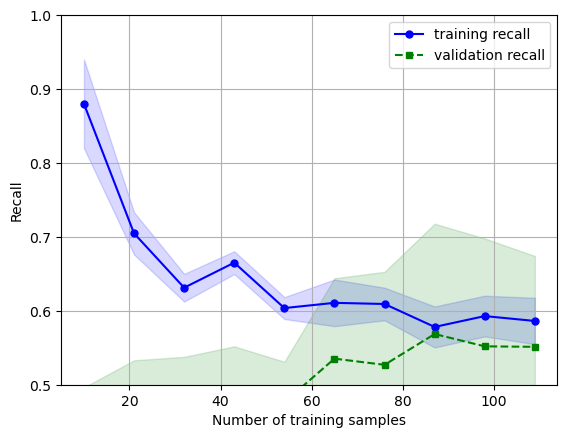


 QDA Learning Curve


C:\Users\PARAMVIR SINGH\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\PARAMVIR SINGH\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\PARAMVIR SINGH\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\PARAMVIR SINGH\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\PARAMVIR SINGH\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\PARAMVIR SINGH\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variab

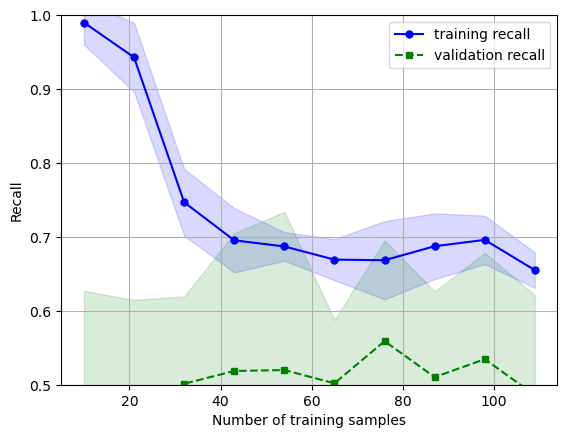


 Logistic Regression Learning Curve


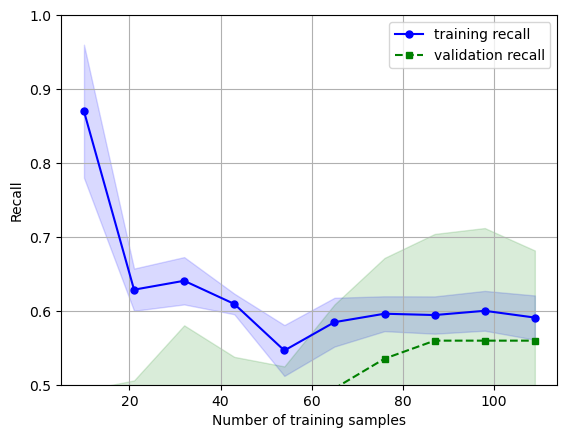

In [13]:
#Plot Learning Curve
print('LDA Learning Curve')
plot_learning_curves(pipe_lda)
print('\n QDA Learning Curve')
plot_learning_curves(pipe_qda)
print('\n Logistic Regression Learning Curve')
plot_learning_curves(pipe_logreg)

Model Evaluation - Recall Score
LDA 0.54 +/- 0.12
QDA 0.50 +/- 0.14
Log Reg 0.54 +/- 0.12




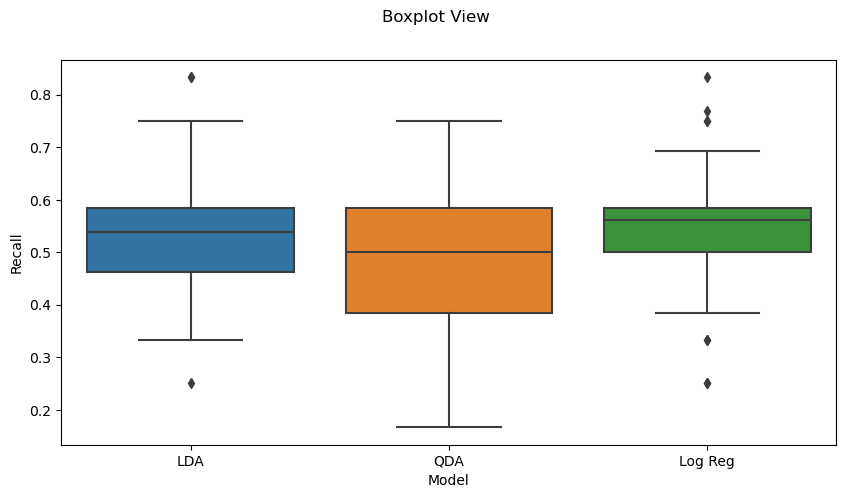

In [14]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('LDA',pipe_lda))
models.append(('QDA',pipe_qda))
models.append(('Log Reg',pipe_logreg))

#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x_train_smt,y_train_smt,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n') 

fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

In [15]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train_smt, y_train_smt)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Validation Statistics
    target_names=['Outcome 0','Outcome 1']
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names)) 
        
    #Transform the variables into binary (0,1) - ROC Curve
    from sklearn import preprocessing
    Forecast1=pd.DataFrame(y_pred)
    Outcome1=pd.DataFrame(y_test)
    lb1 = preprocessing.LabelBinarizer()
    OutcomeB1 =lb1.fit_transform(Outcome1)
    ForecastB1 = lb1.fit_transform(Forecast1)
    
    #Setup the ROC Curve
    from sklearn.metrics import roc_curve, auc
    from sklearn import metrics
    fpr, tpr, threshold = metrics.roc_curve(OutcomeB1, ForecastB1)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC Curve')
    #Plot the ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()   


Optimized Model

Model Name: LinearDiscriminantAnalysis()

Best Parameters: {'clf__solver': 'svd'}

 [[ 8  5]
 [ 2 14]]

               precision    recall  f1-score   support

   Outcome 0       0.80      0.62      0.70        13
   Outcome 1       0.74      0.88      0.80        16

    accuracy                           0.76        29
   macro avg       0.77      0.75      0.75        29
weighted avg       0.77      0.76      0.75        29

ROC Curve


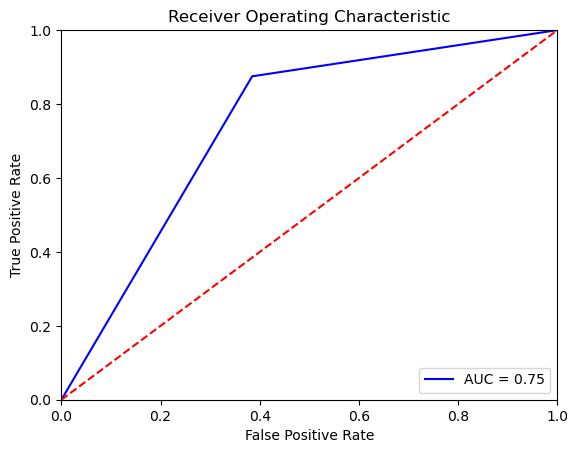


Optimized Model

Model Name: QuadraticDiscriminantAnalysis()

Best Parameters: {}

 [[ 9  4]
 [ 3 13]]

               precision    recall  f1-score   support

   Outcome 0       0.75      0.69      0.72        13
   Outcome 1       0.76      0.81      0.79        16

    accuracy                           0.76        29
   macro avg       0.76      0.75      0.75        29
weighted avg       0.76      0.76      0.76        29

ROC Curve


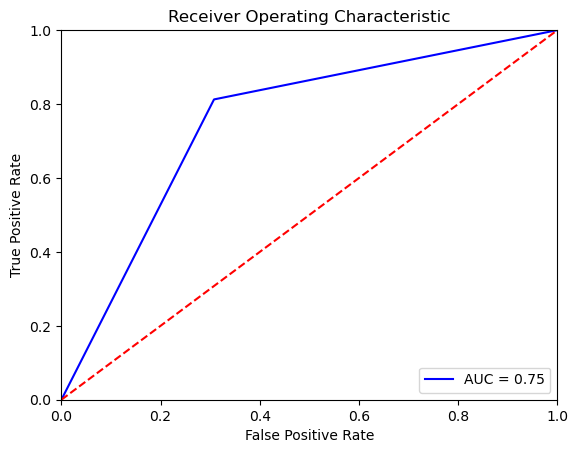


Optimized Model

Model Name: LogisticRegression(class_weight='balanced', random_state=100)

Best Parameters: {'clf__C': 10, 'clf__penalty': 'l2'}

 [[ 8  5]
 [ 2 14]]

               precision    recall  f1-score   support

   Outcome 0       0.80      0.62      0.70        13
   Outcome 1       0.74      0.88      0.80        16

    accuracy                           0.76        29
   macro avg       0.77      0.75      0.75        29
weighted avg       0.77      0.76      0.75        29

ROC Curve


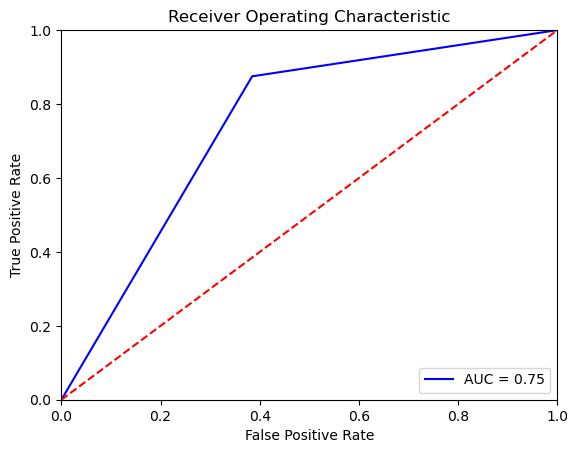

In [16]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)